In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

require(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [4]:
# show all columns in the dataframe

pd.set_option('display.max_columns', None)

In [60]:
df_counts = pd.read_csv('CB-Final_2.csv')
df_counts.head()

,code,name,Tobacco Retail Dealer Cap,Active Tobacco Retail Dealer Licenses,TRD Available Under Cap,Electronic Cigarette Retail Dealer Cap,Active Electronic Cigarette Retail Dealer Licenses,ECD Available Under Cap,activer per 1000,income,poverty,age_med,population,black_population,asian_population,hispanic_population,occupied_unit,vacant_unit,owner,renter,vacant_occupied_ratio,owner_renter_ratio,total_count,black_pct,asian_pct,hispanic_pct,retailers_per_1000,perc_owners,borough,is_midtown
0,1,Bronx 1&2,99,75,24,18,15,3,0.512358,31651,32.8,41.6,146382,61300,1123,99439,56269,1095,6332,49937,0.019460,0.126800,90,0.418767,0.007672,0.679312,0.614830,11.253088,Bronx,False
1,1,Bronx 10,52,65,0,30,37,0,0.474695,61426,18.9,36.6,136930,45796,9397,65555,56040,2306,25013,31027,0.041149,0.806169,102,0.334448,0.068626,0.478748,0.744906,44.634190,Bronx,False
2,1,Bronx 11,55,60,0,19,22,0,0.522311,61668,17.6,43.5,114874,31517,12802,55518,44217,3582,13513,30704,0.081010,0.440106,82,0.274361,0.111444,0.483295,0.713826,30.560644,Bronx,False
3,1,Bronx 12,66,64,2,21,28,0,0.416152,60483,26.0,35.9,153790,105224,4201,43593,57194,3673,22723,34471,0.064220,0.659192,92,0.684206,0.027316,0.283458,0.598218,39.729692,Bronx,False
4,1,Bronx 3&6,103,91,12,15,16,2,0.538487,31120,38.4,36.2,168992,60715,3536,89083,52974,1077,4896,48078,0.020331,0.101835,107,0.359277,0.020924,0.527143,0.633166,9.242270,Bronx,False


In [21]:
df_counts['perc_occupied'] = df_counts['occupied_unit'] / (df_counts['occupied_unit'] + df_counts['vacant_unit']) * 100
df_counts.head()

,code,name,Tobacco Retail Dealer Cap,Active Tobacco Retail Dealer Licenses,TRD Available Under Cap,Electronic Cigarette Retail Dealer Cap,Active Electronic Cigarette Retail Dealer Licenses,ECD Available Under Cap,activer per 1000,income,poverty,age_med,population,black_population,asian_population,hispanic_population,occupied_unit,vacant_unit,owner,renter,vacant_occupied_ratio,owner_renter_ratio,total_count,black_pct,asian_pct,hispanic_pct,retailers_per_1000,perc_owners,perc_occupied
0,1,Bronx 1&2,99,75,24,18,15,3,0.512358,31651,32.8,41.6,146382,61300,1123,99439,56269,1095,6332,49937,0.019460,0.126800,90,0.418767,0.007672,0.679312,0.614830,11.253088,98.091137
1,1,Bronx 10,52,65,0,30,37,0,0.474695,61426,18.9,36.6,136930,45796,9397,65555,56040,2306,25013,31027,0.041149,0.806169,102,0.334448,0.068626,0.478748,0.744906,44.634190,96.047715
2,1,Bronx 11,55,60,0,19,22,0,0.522311,61668,17.6,43.5,114874,31517,12802,55518,44217,3582,13513,30704,0.081010,0.440106,82,0.274361,0.111444,0.483295,0.713826,30.560644,92.506119
3,1,Bronx 12,66,64,2,21,28,0,0.416152,60483,26.0,35.9,153790,105224,4201,43593,57194,3673,22723,34471,0.064220,0.659192,92,0.684206,0.027316,0.283458,0.598218,39.729692,93.965531
4,1,Bronx 3&6,103,91,12,15,16,2,0.538487,31120,38.4,36.2,168992,60715,3536,89083,52974,1077,4896,48078,0.020331,0.101835,107,0.359277,0.020924,0.527143,0.633166,9.242270,98.007437


In [22]:
df_counts['perc_occupied'].describe()

count    55.000000
mean     92.539092
std       4.081856
min      78.846572
25%      91.484512
50%      93.779047
75%      94.933772
max      98.091137
Name: perc_occupied, dtype: float64

In [23]:
#exclude row where name = 'Manhattan 5&6'
df_counts = df_counts[df_counts['name'] != 'Manhattan 5&6']
df_counts = df_counts[df_counts['name'] != 'Manhattan 1&2']
df_counts


,code,name,Tobacco Retail Dealer Cap,Active Tobacco Retail Dealer Licenses,TRD Available Under Cap,Electronic Cigarette Retail Dealer Cap,Active Electronic Cigarette Retail Dealer Licenses,ECD Available Under Cap,activer per 1000,income,poverty,age_med,population,black_population,asian_population,hispanic_population,occupied_unit,vacant_unit,owner,renter,vacant_occupied_ratio,owner_renter_ratio,total_count,black_pct,asian_pct,hispanic_pct,retailers_per_1000,perc_owners,perc_occupied
0,1,Bronx 1&2,99,75,24,18,15,3,0.512358,31651,32.8,41.6,146382,61300,1123,99439,56269,1095,6332,49937,0.019460,0.126800,90,0.418767,0.007672,0.679312,0.614830,11.253088,98.091137
1,1,Bronx 10,52,65,0,30,37,0,0.474695,61426,18.9,36.6,136930,45796,9397,65555,56040,2306,25013,31027,0.041149,0.806169,102,0.334448,0.068626,0.478748,0.744906,44.634190,96.047715
2,1,Bronx 11,55,60,0,19,22,0,0.522311,61668,17.6,43.5,114874,31517,12802,55518,44217,3582,13513,30704,0.081010,0.440106,82,0.274361,0.111444,0.483295,0.713826,30.560644,92.506119
3,1,Bronx 12,66,64,2,21,28,0,0.416152,60483,26.0,35.9,153790,105224,4201,43593,57194,3673,22723,34471,0.064220,0.659192,92,0.684206,0.027316,0.283458,0.598218,39.729692,93.965531
4,1,Bronx 3&6,103,91,12,15,16,2,0.538487,31120,38.4,36.2,168992,60715,3536,89083,52974,1077,4896,48078,0.020331,0.101835,107,0.359277,0.020924,0.527143,0.633166,9.242270,98.007437
5,1,Bronx 4,88,75,13,9,5,4,0.536684,42963,34.6,45.3,139747,52840,2032,74275,42620,905,2381,40239,0.021234,0.059171,80,0.378112,0.014541,0.531496,0.572463,5.586579,97.920735
6,1,Bronx 5,68,57,11,14,14,0,0.496395,32049,38.0,41.0,114828,32444,7514,96713,52601,3000,2917,49684,0.057033,0.058711,71,0.282544,0.065437,0.842242,0.618316,5.545522,94.604414
7,1,Bronx 7,63,78,0,18,12,6,0.589213,23874,28.6,43.2,132380,17907,4578,41210,38455,1328,15921,22534,0.034534,0.706532,90,0.135270,0.034582,0.311301,0.679861,41.401638,96.661891
8,1,Bronx 8,36,36,0,12,12,0,0.412466,76271,10.6,41.0,87280,64141,18951,109540,70168,5886,15963,54205,0.083884,0.294493,48,0.734888,0.217129,1.255041,0.549954,22.749686,92.260762
9,1,Bronx 9,78,54,24,15,15,0,0.292298,46904,23.7,42.6,184743,79924,3802,105892,62497,2098,3180,59317,0.033570,0.053610,69,0.432623,0.020580,0.573185,0.373492,5.088244,96.752071


In [61]:
%%R -i df_counts

head(df_counts)

  code      name Tobacco Retail Dealer Cap
0    1 Bronx 1&2                        99
1    1  Bronx 10                        52
2    1  Bronx 11                        55
3    1  Bronx 12                        66
4    1 Bronx 3&6                       103
5    1   Bronx 4                        88
  Active Tobacco Retail Dealer Licenses TRD Available Under Cap
0                                    75                      24
1                                    65                       0
2                                    60                       0
3                                    64                       2
4                                    91                      12
5                                    75                      13
  Electronic Cigarette Retail Dealer Cap
0                                     18
1                                     30
2                                     19
3                                     21
4                                     15
5    

In [48]:
%%R

model <- lm(total_count ~ age_med + black_pct + asian_pct + hispanic_pct + perc_occupied + income, data = df_counts)
summary(model)


Call:
lm(formula = total_count ~ age_med + black_pct + asian_pct + 
    hispanic_pct + perc_occupied + income, data = df_counts)

Residuals:
    Min      1Q  Median      3Q     Max 
-44.472 -19.160  -3.718  12.146  65.549 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    5.258e+02  1.284e+02   4.095 0.000169 ***
age_med       -1.437e-01  9.362e-01  -0.154 0.878664    
black_pct     -7.758e+01  2.323e+01  -3.340 0.001670 ** 
asian_pct      2.439e+00  4.223e+01

   0.058 0.954185    
hispanic_pct   1.687e+00  2.137e+01   0.079 0.937412    
perc_occupied -4.323e+00  1.383e+00  -3.125 0.003080 ** 
income         5.600e-06  1.862e-04   0.030 0.976137    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 30.88 on 46 degrees of freedom
Multiple R-squared:  0.4313,	Adjusted R-squared:  0.3571 
F-statistic: 5.813 on 6 and 46 DF,  p-value: 0.0001436



In [159]:
%%R

model <- lm(retailers_per_1000 ~ age_med + black_pct + income + perc_owners + vacant_occupied_ratio, data = df_counts)
summary(model)


Call:
lm(formula = retailers_per_1000 ~ age_med + black_pct + income + 
    perc_owners + vacant_occupied_ratio, data = df_counts)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6026 -0.1226 -0.0204  0.1441  0.7115 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -1.134e-01  3.260e-01  -0.348  0.72945    
age_med                1.433e-02  7.183e-03   1.995  0.05161 .  
black_pct             -4.584e-01  1.655e-01  -2.769  0.00791 ** 
income                 2.597e-06  1.512e-06   1.718  0.09213 .  
perc_owners           -4.134e-03  2.159e-03  -1.914  0.06141 .  
vacant_occupied_ratio  3.583e+00  8.392e-01   4.269 8.97e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2514 on 49 degrees of freedom
Multiple R-squared:  0.5851,	Adjusted R-squared:  0.5428 
F-statistic: 13.82 on 5 and 49 DF,  p-value: 1.995e-08




Attaching package: ‘flexplot’

The following object is masked from ‘package:ggplot2’:

    flip_data



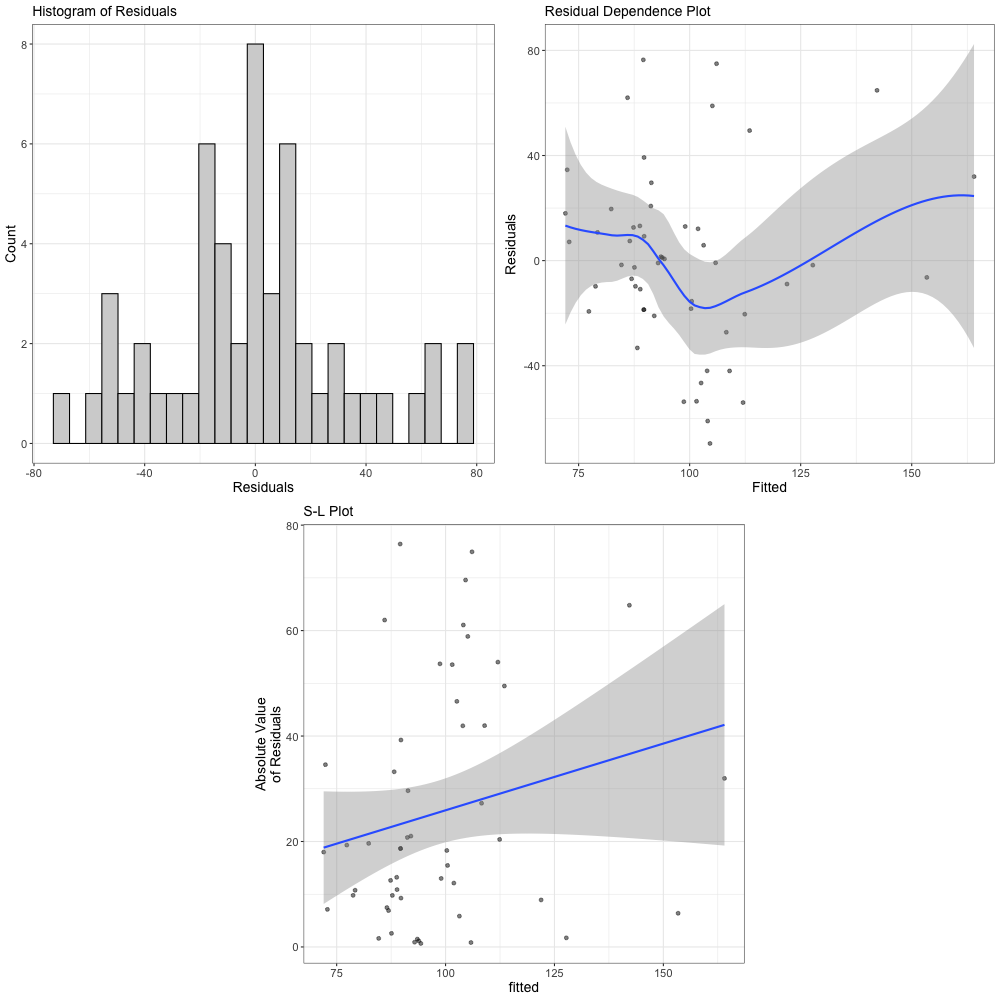

In [33]:
%%R -w 1000 -h 1000

library(flexplot)

visualize(model, plot="residuals")

In [35]:
%%R

require(tidyverse)

In [39]:
%%R 

# add residuals and fitted to dataframe

df_fitted <- df_counts %>% mutate(
    fitted = fitted(model),
    residuals = residuals(model)
)

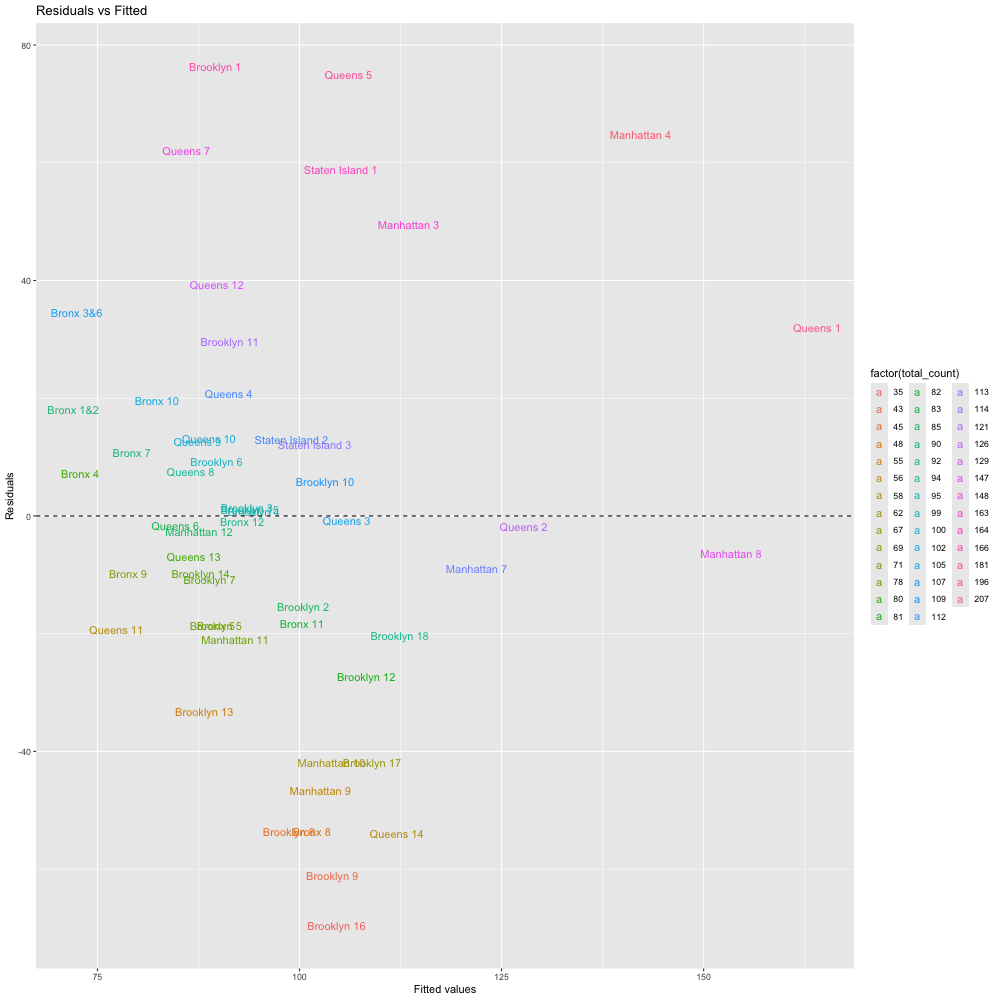

In [40]:
%%R -w 1000 -h 1000


# library(ggrepel)

ggplot(df_fitted) +
    aes(x = fitted, y = residuals, color=factor(total_count)) + 
    # geom_point() + 
    geom_text(aes(label = name)) +
    geom_hline(yintercept = 0, linetype = 'dashed') +
    labs(
        title = 'Residuals vs Fitted',
        x = 'Fitted values',
        y = 'Residuals'
    )
    # geom_smooth(method = 'lm')

In [53]:
df_counts[df_counts['name'] == 'Manhattan 4']

,code,name,Tobacco Retail Dealer Cap,Active Tobacco Retail Dealer Licenses,TRD Available Under Cap,Electronic Cigarette Retail Dealer Cap,Active Electronic Cigarette Retail Dealer Licenses,ECD Available Under Cap,activer per 1000,income,poverty,age_med,population,black_population,asian_population,hispanic_population,occupied_unit,vacant_unit,owner,renter,vacant_occupied_ratio,owner_renter_ratio,total_count,black_pct,asian_pct,hispanic_pct,retailers_per_1000,perc_owners,perc_occupied,total_caps
33,2,Manhattan 4,97,121,0,58,86,0,1.074772,110114,15.4,44.5,112582,9755,21765,23475,67653,12663,12068,55585,0.187176,0.217109,207,0.086648,0.193326,0.208515,1.83866,17.838086,84.233528,155


# model the caps

In [43]:
df_counts.head()

,code,name,Tobacco Retail Dealer Cap,Active Tobacco Retail Dealer Licenses,TRD Available Under Cap,Electronic Cigarette Retail Dealer Cap,Active Electronic Cigarette Retail Dealer Licenses,ECD Available Under Cap,activer per 1000,income,poverty,age_med,population,black_population,asian_population,hispanic_population,occupied_unit,vacant_unit,owner,renter,vacant_occupied_ratio,owner_renter_ratio,total_count,black_pct,asian_pct,hispanic_pct,retailers_per_1000,perc_owners,perc_occupied
0,1,Bronx 1&2,99,75,24,18,15,3,0.512358,31651,32.8,41.6,146382,61300,1123,99439,56269,1095,6332,49937,0.019460,0.126800,90,0.418767,0.007672,0.679312,0.614830,11.253088,98.091137
1,1,Bronx 10,52,65,0,30,37,0,0.474695,61426,18.9,36.6,136930,45796,9397,65555,56040,2306,25013,31027,0.041149,0.806169,102,0.334448,0.068626,0.478748,0.744906,44.634190,96.047715
2,1,Bronx 11,55,60,0,19,22,0,0.522311,61668,17.6,43.5,114874,31517,12802,55518,44217,3582,13513,30704,0.081010,0.440106,82,0.274361,0.111444,0.483295,0.713826,30.560644,92.506119
3,1,Bronx 12,66,64,2,21,28,0,0.416152,60483,26.0,35.9,153790,105224,4201,43593,57194,3673,22723,34471,0.064220,0.659192,92,0.684206,0.027316,0.283458,0.598218,39.729692,93.965531
4,1,Bronx 3&6,103,91,12,15,16,2,0.538487,31120,38.4,36.2,168992,60715,3536,89083,52974,1077,4896,48078,0.020331,0.101835,107,0.359277,0.020924,0.527143,0.633166,9.242270,98.007437


In [64]:
df_counts['total_caps'] = df_counts['Tobacco Retail Dealer Cap'] + df_counts['Electronic Cigarette Retail Dealer Cap']
df_counts.head()

,code,name,Tobacco Retail Dealer Cap,Active Tobacco Retail Dealer Licenses,TRD Available Under Cap,Electronic Cigarette Retail Dealer Cap,Active Electronic Cigarette Retail Dealer Licenses,ECD Available Under Cap,activer per 1000,income,poverty,age_med,population,black_population,asian_population,hispanic_population,occupied_unit,vacant_unit,owner,renter,vacant_occupied_ratio,owner_renter_ratio,total_count,black_pct,asian_pct,hispanic_pct,retailers_per_1000,perc_owners,borough,is_midtown,total_caps
0,1,Bronx 1&2,99,75,24,18,15,3,0.512358,31651,32.8,41.6,146382,61300,1123,99439,56269,1095,6332,49937,0.019460,0.126800,90,0.418767,0.007672,0.679312,0.614830,11.253088,Bronx,False,117
1,1,Bronx 10,52,65,0,30,37,0,0.474695,61426,18.9,36.6,136930,45796,9397,65555,56040,2306,25013,31027,0.041149,0.806169,102,0.334448,0.068626,0.478748,0.744906,44.634190,Bronx,False,82
2,1,Bronx 11,55,60,0,19,22,0,0.522311,61668,17.6,43.5,114874,31517,12802,55518,44217,3582,13513,30704,0.081010,0.440106,82,0.274361,0.111444,0.483295,0.713826,30.560644,Bronx,False,74
3,1,Bronx 12,66,64,2,21,28,0,0.416152,60483,26.0,35.9,153790,105224,4201,43593,57194,3673,22723,34471,0.064220,0.659192,92,0.684206,0.027316,0.283458,0.598218,39.729692,Bronx,False,87
4,1,Bronx 3&6,103,91,12,15,16,2,0.538487,31120,38.4,36.2,168992,60715,3536,89083,52974,1077,4896,48078,0.020331,0.101835,107,0.359277,0.020924,0.527143,0.633166,9.242270,Bronx,False,118


In [46]:
%%R -i df_counts

names(df_counts)

 [1] "code"                                              
 [2] "name"                                              
 [3] "Tobacco Retail Dealer Cap"                         
 [4]

 "Active Tobacco Retail Dealer Licenses"             
 [5] "TRD Available Under Cap"                           
 [6] "Electronic Cigarette Retail Dealer Cap"            
 [7] "Active Electronic Cigarette Retail Dealer Licenses"
 [8] "ECD Available Under Cap"                           
 [9] "activer per 1000"                                  
[10] "income"                                            
[11] "poverty"                                           
[12] "age_med"                                           
[13] "population"                                        
[14] "black_population"                                  
[15] "asian_population"                                  
[16] "hispanic_population"                               
[17] "occupied_unit"                                     
[18] "vacant_unit"                                       
[19] "owner"                                             
[20] "renter"                                            
[21] "vacant_occup

In [50]:
%%R

model <- lm(total_caps ~ age_med + black_pct + asian_pct + hispanic_pct + perc_occupied + income, data = df_counts)
summary(model)


Call:
lm(formula = total_caps ~ age_med + black_pct + asian_pct + hispanic_pct + 
    perc_occupied + income, data = df_counts)

Residuals:
    Min      1Q  Median      3Q     Max 
-50.206 -18.023  -6.133  16.699  72.850 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)    3.317e+02  1.222e+02

   2.714  0.00933 **
age_med       -1.822e-01  8.911e-01  -0.205  0.83886   
black_pct     -4.599e+01  2.211e+01  -2.080  0.04314 * 
asian_pct     -4.841e+01  4.020e+01  -1.204  0.23457   
hispanic_pct   5.211e+00  2.034e+01   0.256  0.79891   
perc_occupied -2.234e+00  1.317e+00  -1.697  0.09654 . 
income        -1.115e-04  1.772e-04  -0.629  0.53240   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 29.39 on 46 degrees of freedom
Multiple R-squared:  0.1579,	Adjusted R-squared:  0.04808 
F-statistic: 1.438 on 6 and 46 DF,  p-value: 0.221



In [57]:
df_counts[]

,code,name,Tobacco Retail Dealer Cap,Active Tobacco Retail Dealer Licenses,TRD Available Under Cap,Electronic Cigarette Retail Dealer Cap,Active Electronic Cigarette Retail Dealer Licenses,ECD Available Under Cap,activer per 1000,income,poverty,age_med,population,black_population,asian_population,hispanic_population,occupied_unit,vacant_unit,owner,renter,vacant_occupied_ratio,owner_renter_ratio,total_count,black_pct,asian_pct,hispanic_pct,retailers_per_1000,perc_owners,perc_occupied,total_caps
0,1,Bronx 1&2,99,75,24,18,15,3,0.512358,31651,32.8,41.6,146382,61300,1123,99439,56269,1095,6332,49937,0.019460,0.126800,90,0.418767,0.007672,0.679312,0.614830,11.253088,98.091137,117
1,1,Bronx 10,52,65,0,30,37,0,0.474695,61426,18.9,36.6,136930,45796,9397,65555,56040,2306,25013,31027,0.041149,0.806169,102,0.334448,0.068626,0.478748,0.744906,44.634190,96.047715,82
2,1,Bronx 11,55,60,0,19,22,0,0.522311,61668,17.6,43.5,114874,31517,12802,55518,44217,3582,13513,30704,0.081010,0.440106,82,0.274361,0.111444,0.483295,0.713826,30.560644,92.506119,74
3,1,Bronx 12,66,64,2,21,28,0,0.416152,60483,26.0,35.9,153790,105224,4201,43593,57194,3673,22723,34471,0.064220,0.659192,92,0.684206,0.027316,0.283458,0.598218,39.729692,93.965531,87
4,1,Bronx 3&6,103,91,12,15,16,2,0.538487,31120,38.4,36.2,168992,60715,3536,89083,52974,1077,4896,48078,0.020331,0.101835,107,0.359277,0.020924,0.527143,0.633166,9.242270,98.007437,118
5,1,Bronx 4,88,75,13,9,5,4,0.536684,42963,34.6,45.3,139747,52840,2032,74275,42620,905,2381,40239,0.021234,0.059171,80,0.378112,0.014541,0.531496,0.572463,5.586579,97.920735,97
6,1,Bronx 5,68,57,11,14,14,0,0.496395,32049,38.0,41.0,114828,32444,7514,96713,52601,3000,2917,49684,0.057033,0.058711,71,0.282544,0.065437,0.842242,0.618316,5.545522,94.604414,82
7,1,Bronx 7,63,78,0,18,12,6,0.589213,23874,28.6,43.2,132380,17907,4578,41210,38455,1328,15921,22534,0.034534,0.706532,90,0.135270,0.034582,0.311301,0.679861,41.401638,96.661891,81
8,1,Bronx 8,36,36,0,12,12,0,0.412466,76271,10.6,41.0,87280,64141,18951,109540,70168,5886,15963,54205,0.083884,0.294493,48,0.734888,0.217129,1.255041,0.549954,22.749686,92.260762,48
9,1,Bronx 9,78,54,24,15,15,0,0.292298,46904,23.7,42.6,184743,79924,3802,105892,62497,2098,3180,59317,0.033570,0.053610,69,0.432623,0.020580,0.573185,0.373492,5.088244,96.752071,93


In [82]:
df_diff = df_counts[['name', 'total_caps', 'total_count', 'black_pct', 'population']]
df_diff['difference']  = df_diff['total_caps'] - df_diff['total_count']
df_diff['caps_per_1000'] = df_diff['total_caps'] / df_diff['population'] * 1000
df_diff['stores_per_1000'] = df_diff['total_count'] / df_diff['population'] * 1000
df_diff.sort_values('stores_per_1000', ascending=False)

,name,total_caps,total_count,black_pct,population,difference,caps_per_1000,stores_per_1000
34,Manhattan 5&6,349,423,0.064389,183089,-74,1.906177,2.310352
28,Manhattan 1&2,223,279,0.053782,149102,-56,1.495620,1.871202
33,Manhattan 4,155,207,0.086648,112582,-52,1.376774,1.838660
32,Manhattan 3,145,163,0.117733,141787,-18,1.022661,1.149612
38,Queens 1,152,196,0.120266,177115,-44,0.858199,1.106626
47,Queens 5,134,181,0.045133,175992,-47,0.761398,1.028456
22,Brooklyn 4,104,95,0.252311,94423,9,1.101427,1.006111
44,Queens 2,96,126,0.045670,125926,-30,0.762352,1.000588
11,Brooklyn 10,89,109,0.026890,116696,-20,0.762665,0.934051
24,Brooklyn 6,74,99,0.107060,107930,-25,0.685630,0.917261


In [83]:
df_diff[df_diff['black_pct'] > 0.5]

,name,total_caps,total_count,black_pct,population,difference,caps_per_1000,stores_per_1000
3,Bronx 12,87,92,0.684206,153790,-5,0.565706,0.598218
8,Bronx 8,48,48,0.734888,87280,0,0.549954,0.549954
17,Brooklyn 16,54,35,0.729131,99827,19,0.540936,0.350607
18,Brooklyn 17,68,67,0.862084,160620,1,0.423359,0.417134
19,Brooklyn 18,76,92,0.633068,189888,-16,0.400236,0.484496
23,Brooklyn 5,109,71,0.564777,200828,38,0.542753,0.353536
26,Brooklyn 8,58,45,0.518214,107419,13,0.539942,0.418920
27,Brooklyn 9,49,43,0.551467,94109,6,0.520673,0.456917
29,Manhattan 10,75,62,0.568991,138953,13,0.539751,0.446194
41,Queens 12,141,129,0.612771,248158,12,0.568186,0.519830


<Axes: >

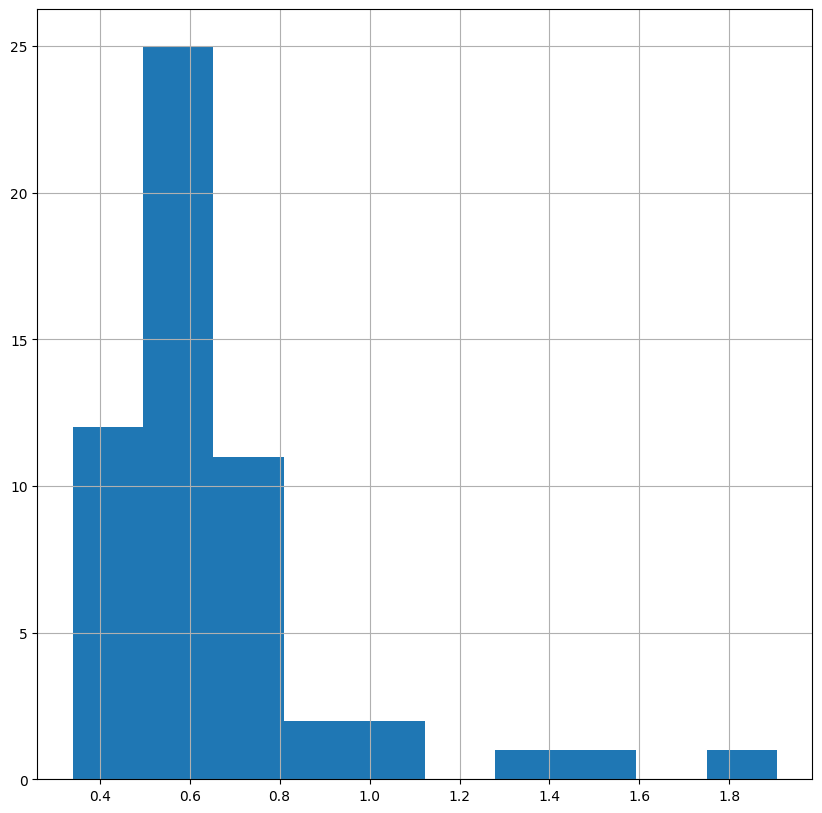

In [79]:
df_diff['caps_per_1000'].hist(figsize=(10, 10))

In [85]:
#sort df_counts by total_counts
df_counts.sort_values('total_count', ascending=False)

,code,name,Tobacco Retail Dealer Cap,Active Tobacco Retail Dealer Licenses,TRD Available Under Cap,Electronic Cigarette Retail Dealer Cap,Active Electronic Cigarette Retail Dealer Licenses,ECD Available Under Cap,activer per 1000,income,poverty,age_med,population,black_population,asian_population,hispanic_population,occupied_unit,vacant_unit,owner,renter,vacant_occupied_ratio,owner_renter_ratio,total_count,black_pct,asian_pct,hispanic_pct,retailers_per_1000,perc_owners,borough,is_midtown,total_caps
34,2,Manhattan 5&6,223,252,0,126,171,0,1.376380,142767,9.0,37.6,183089,11789,41394,14459,105067,28188,32806,72261,0.268286,0.453993,423,0.064389,0.226087,0.078973,2.310352,31.223886,Manhattan,True,349
28,2,Manhattan 1&2,141,172,0,82,107,0,1.153573,159292,8.5,49.5,149102,8019,27571,13697,78584,12247,21518,57066,0.155846,0.377072,279,0.053782,0.184914,0.091863,1.871202,27.382164,Manhattan,False,223
33,2,Manhattan 4,97,121,0,58,86,0,1.074772,110114,15.4,44.5,112582,9755,21765,23475,67653,12663,12068,55585,0.187176,0.217109,207,0.086648,0.193326,0.208515,1.838660,17.838086,Manhattan,True,155
38,4,Queens 1,106,131,0,46,65,0,0.739632,81167,16.1,41.6,177115,21301,34324,44477,80758,20287,15196,65562,0.251207,0.231781,196,0.120266,0.193795,0.251119,1.106626,18.816712,Queens,False,152
47,4,Queens 5,99,132,0,35,49,0,0.750034,86150,11.3,32.3,175992,7943,19817,66619,65971,6232,25512,40459,0.094466,0.630564,181,0.045133,0.112602,0.378534,1.028456,38.671537,Queens,False,134
10,3,Brooklyn 1,114,108,6,53,58,0,0.577713,95111,18.8,37.9,186944,21264,14277,46453,84718,4816,13628,71090,0.056847,0.191701,166,0.113745,0.076370,0.248486,0.887966,16.086310,Brooklyn,False,167
52,5,Staten Island 1,99,110,0,34,54,0,0.596025,81246,15.0,40.9,184556,44113,22411,56857,65022,5996,36570,28452,0.092215,1.285323,164,0.239022,0.121432,0.308075,0.888619,56.242503,Staten Island,False,133
32,2,Manhattan 3,89,96,0,56,67,0,0.677072,56386,26.0,42.7,141787,16693,42145,36823,73474,8257,11637,61837,0.112380,0.188188,163,0.117733,0.297242,0.259706,1.149612,15.838256,Manhattan,False,145
49,4,Queens 7,71,97,0,31,51,0,0.392950,70508,16.0,43.1,246851,6123,138953,42745,96922,4750,48167,48755,0.049008,0.987940,148,0.024804,0.562902,0.173161,0.599552,49.696663,Queens,False,102
36,2,Manhattan 8,74,93,0,39,54,0,0.449330,143047,7.2,31.7,206975,9931,27725,18488,114602,25116,45126,69476,0.219158,0.649519,147,0.047982,0.133953,0.089325,0.710231,39.376276,Manhattan,False,113


In [72]:
%%R -i df_counts

model <- lm(total_caps ~ black_pct + population, data = df_counts)
summary(model)


Call:
lm(formula = total_caps ~ black_pct + population, data = df_counts)

Residuals:
    Min      1Q  Median      3Q     Max 
-61.389 -20.421  -5.631 

 10.780 227.421 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  4.058e+01  2.697e+01   1.505  0.13849   
black_pct   -5.066e+01  2.681e+01  -1.890  0.06438 . 
population   4.602e-04  1.625e-04   2.833  0.00655 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 44.72 on 52 degrees of freedom
Multiple R-squared:  0.1965,	Adjusted R-squared:  0.1656 
F-statistic:  6.36 on 2 and 52 DF,  p-value: 0.003382



In [67]:
%%R -i df_counts

model <- lm(total_caps ~ age_med + black_pct + asian_pct + hispanic_pct + income + population, data = df_counts)
summary(model)


Call:
lm(formula = total_caps ~ age_med + black_pct + asian_pct + hispanic_pct + 
    income + population, data = df_counts)

Residuals:
    Min      1Q  Median      3Q     Max 
-77.669 -20.711  -6.914  13.065 204.567 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)   
(Intercept)   4.612e+00  6.547e+01   0.070  0.94414   
age_med       9.826e-02  1.237e+00   0.079  0.93702   
black_pct    -5.196e+01  3.267e+01  -1.590  0.11833   
asian_pct    -8.091e+01  5.923e+01  -1.366  0.17830   
hispanic_pct  1.928e+01  3.057e+01   0.631  0.53113   
income        4.950e-04  2.244e-04   2.206  0.03222 * 
population    4.674e-04  1.652e-04   2.829  0.00679 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 43.5 on 48 degrees of freedom
Multiple R-squared:  0.2982,	Adjusted R-squared:  0.2105 
F-statistic:   3.4 on 6 and 48 DF,  p-value: 0.007091



In [68]:
%%R -i df_counts

model <- lm(total_count ~ total_caps, data = df_counts)
summary(model)


Call:
lm(formula = total_count ~ total_caps, data = df_counts)

Residuals:
    Min      1Q  Median      3Q     Max 
-51.071 -14.612   1.417  16.828  34.301 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -8.29619    6.59035  -1.259    0.214    
total_caps   1.19603    0.06088  19.644   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21.91 on 53 degrees of freedom
Multiple R-squared:  0.8792,	Adjusted R-squared:  0.877 
F-statistic: 385.9 on 1 and 53 DF,  p-value: < 2.2e-16



In [69]:
%%R -i df_counts

model <- lm(total_count ~ age_med + black_pct + asian_pct + hispanic_pct + income + population + total_caps, data = df_counts)
summary(model)


Call:
lm(formula = total_count ~ age_med + black_pct + asian_pct + 
    hispanic_pct + income + population + total_caps, data = df_counts)

Residuals:
    Min      1Q  Median      3Q     Max 
-30.291  -8.408  -0.016  11.341  25.895 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   8.898e+00  2.373e+01   0.375   0.7094    
age_med      -3.606e-01  4.484e-01  -0.804   0.4254    
black_pct    -2.828e+01  1.215e+01  -2.328   0.0243 *  
asian_pct     5.692e+01  2.188e+01   2.602   0.0124 *  
hispanic_pct -9.529e+00  1.112e+01  -0.857   0.3960    
income        2.381e-04  8.536e-05   2.789   0.0076 ** 
population   -7.614e-05  6.466e-05  -1.178   0.2449    
total_caps    1.114e+00  5.231e-02  21.286   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.77 on 47 degrees of freedom
Multiple R-squared:  0.9445,	Adjusted R-squared:  0.9363 
F-statistic: 114.3 on 7 and 47 DF,  p-value: < 2.2e-16



In [114]:
df_density_ranking = df_counts[['name', 'total_count', 'total_caps', 'population', 'retailers_per_1000', 'is_midtown']].sort_values('retailers_per_1000', ascending=False)
df_density_ranking

,name,total_count,total_caps,population,retailers_per_1000,is_midtown
34,Manhattan 5&6,423,349,183089,2.310352,True
28,Manhattan 1&2,279,223,149102,1.871202,False
33,Manhattan 4,207,155,112582,1.838660,True
32,Manhattan 3,163,145,141787,1.149612,False
38,Queens 1,196,152,177115,1.106626,False
47,Queens 5,181,134,175992,1.028456,False
22,Brooklyn 4,95,104,94423,1.006111,False
44,Queens 2,126,96,125926,1.000588,False
11,Brooklyn 10,109,89,116696,0.934051,False
24,Brooklyn 6,99,74,107930,0.917261,False


In [115]:
#export df density ranking as csv
df_density_ranking.to_csv('df_density_ranking.csv')

In [95]:
df_active = pd.read_csv('Active_Tobacco_Retail_Dealer_Licenses_20240425.csv')
df_active

,DCA License Number,License Type,License Expiration Date,License Status,License Creation Date,Industry,Business Name,Business Name 2,Address Building,Address Street Name,Secondary Address Street Name,Address City,Address State,Address ZIP,Contact Phone Number,Address Borough,Borough Code,Community Board,Council District,BIN,BBL,NTA,Census Tract,Detail,Longitude,Latitude,Location
0,1178405-DCA,Business,12/31/2023,Active,08/27/2004,Tobacco Retail Dealer,OLSEN NEWS CORP.,NaN,NaN,BROADWAY,WEST 40 STREET,NEW YORK,NY,10018,646-258-4324,Manhattan,1.0,105.0,3.0,NaN,NaN,NaN,NaN,NaN,-73.986865,40.754317,"(40.75431708865135, -73.98686541972873)"
1,2016212-1-DCA,Business,12/31/2023,Active,12/05/2014,Tobacco Retail Dealer,ASTORIA CENTER INC,NaN,4402,ASTORIA BLVD,NaN,ASTORIA,NY,11103,347-668-4569,Queens,4.0,401.0,22.0,4012858.0,4.007170e+09,QN70,141.0,NaN,-73.906927,40.768202,"(40.76820158202948, -73.9069268281986)"
2,1217359-DCA,Business,12/31/2023,Active,01/11/2006,Tobacco Retail Dealer,"FLEUR, RONY ST",RON'S DELI GROCERY STORE,17024,JAMAICA AVE,NaN,JAMAICA,NY,11432,7186589156,Queens,4.0,412.0,27.0,4217486.0,4.102120e+09,QN61,444.0,NaN,-73.789284,40.707291,"(40.70729121951161, -73.7892842185725)"
3,1435239-DCA,Business,12/31/2023,Active,06/22/2012,Tobacco Retail Dealer,PRESBYTERIAN 164 DELI CORP.,NaN,1081,SAINT NICHOLAS AVE,NaN,NEW YORK,NY,10032,212-568-3130,Manhattan,1.0,112.0,7.0,1062937.0,1.021220e+09,MN36,245.0,NaN,-73.940020,40.837602,"(40.83760200533997, -73.94001991132355)"
4,2045066-1-DCA,Business,12/31/2023,Active,10/26/2016,Tobacco Retail Dealer,A & M DELI & GRILL INC,NaN,13202,JAMAICA AVE,NaN,RICHMOND HILL,NY,11418,347-635-2975,Queens,4.0,409.0,29.0,4196340.0,4.093400e+09,QN54,14202.0,NaN,-73.820497,40.702110,"(40.70210984823282, -73.82049747055868)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,2115065-2-DCA,Business,12/31/2024,Active,07/13/2023,Tobacco Retail Dealer,BRUCKNER EXPRESSWAY INC.,NaN,1419,BRUCKNER BLVD,NaN,BRONX,NY,10472,7182292083,Bronx,2.0,209.0,17.0,2023319.0,2.037080e+09,NaN,NaN,NaN,-73.882953,40.823223,"(40.82322255964534, -73.88295261067725)"
4376,1428271-DCA,Business,12/31/2023,Active,05/07/2012,Tobacco Retail Dealer,"FAMILY DOLLAR STORES OF NEW YORK, INC.",FAMILY DOLLAR #6368,887,E NEW YORK AVE,NaN,BROOKLYN,NY,11203,7573215000,Brooklyn,3.0,309.0,41.0,3331592.0,3.014300e+09,BK60,880.0,NaN,-73.933365,40.662651,"(40.66265090040348, -73.93336484600341)"
4377,2115058-2-DCA,Business,12/31/2024,Active,07/13/2023,Tobacco Retail Dealer,"JUNIORS GOURMET DELI, JUICE BAR, & SMOKE SHOP ...",NaN,1181,BEDFORD AVE,NaN,BROOKLYN,NY,11216,6464313652,Brooklyn,3.0,303.0,36.0,3329696.0,3.018270e+09,NaN,NaN,NaN,-73.953835,40.683024,"(40.6830244295472, -73.95383474133375)"
4378,2013634-1-DCA,Business,12/31/2023,Active,09/18/2014,Tobacco Retail Dealer,TRIDEV PETROLEUM INC,GULF,755,PENNSYLVANIA AVE,NaN,BROOKLYN,NY,11207,NaN,Brooklyn,3.0,305.0,42.0,3097326.0,3.043230e+09,BK82,1104.0,NaN,-73.891155,40.659270,"(40.65927007183555, -73.89115522506118)"


In [97]:
# create column year from license creation date
df_active['year'] = pd.to_datetime(df_active['License Creation Date']).dt.year

In [104]:
#group df_active by year and count them
df_active['year'].value_counts()

year
2018    415
2017    393
2016    343
2015    316
2022    277
2021    266
2000    227
2014    221
2012    184
2010    183
2013    180
2019    165
2011    164
2009    140
2020    140
2008    134
2023    104
2007    101
2006     89
2005     82
2001     69
2004     69
2003     65
2002     53
Name: count, dtype: int64

<Axes: xlabel='year'>

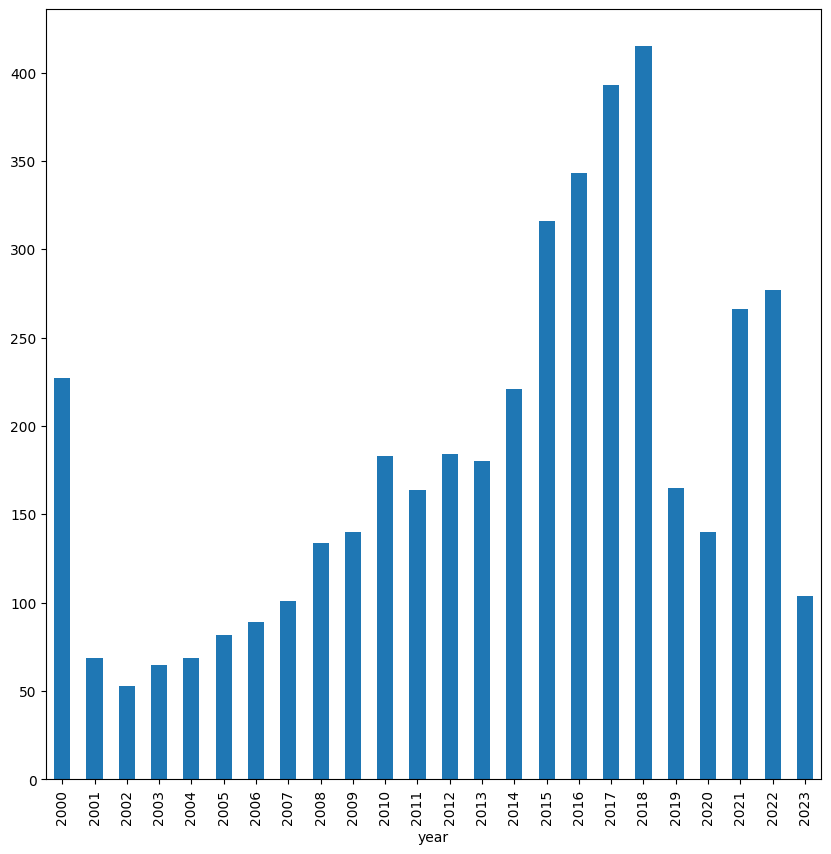

In [120]:
df_active['year'].value_counts().sort_index().plot(kind='bar', figsize=(10, 10))

In [125]:
df_2018 = df_active[df_active['year'] == 2018]

In [ ]:
# from 

In [107]:
df_active['Address City'].unique()

array(['NEW YORK', 'ASTORIA', 'JAMAICA', 'RICHMOND HILL', 'BROOKLYN',
       'JACKSON HEIGHTS', 'BRONX', 'WOODSIDE', 'MIDDLE VILLAGE',
       'ROCKAWAY PARK', 'LONG IS CITY', 'LONG ISLAND CITY',
       'STATEN ISLAND', 'FAR ROCKAWAY', 'CORONA', 'FRESH MEADOWS',
       'KEW GARDENS', 'RIDGEWOOD', 'ELMHURST', 'LAURELTON', 'SUNNYSIDE',
       'S RICHMOND HL', 'FLUSHING', 'COLLEGE POINT', 'BROAD CHANNEL',
       'MASPETH', 'ROCKAWAY BEACH', 'REGO PARK', 'JACKSON HTS',
       'WHITESTONE', 'SOUTH OZONE PARK', 'CAMBRIA HEIGHTS',
       'SOUTH RICHMOND HILL', 'QUEENS VILLAGE', 'FOREST HILLS',
       'GLENDALE', 'SPRINGFIELD GARDENS', 'BAYSIDE', 'OZONE PARK',
       'SAINT ALBANS', 'ROCKAWAY BEAC', 'BELLEROSE', 'OAKLAND GARDENS',
       'OAKLAND GDNS', 'S OZONE PARK', 'LITTLE NECK', 'Elmhurst',
       'EAST ELMHURST', 'QUEENS VLG', 'MIDDLE VLG', 'HOLLIS', 'WOODHAVEN',
       'DOUGLASTON', 'HOWARD BEACH', 'CAMBRIA HTS', 'ARVERNE',
       'Rego Park', 'ROCKAWAY PT', 'SPRNGFLD GDNS', 'Long Island

In [109]:
df_astoria = df_active[(df_active['Address City'] == 'ASTORIA') | (df_active['Address City'] == 'LONG ISLAND CITY') | (df_active['Address City'] == 'LONG IS CITY') | (df_active['Address City'] == 'Long Island City') | (df_active['Address City'] == 'Astoria')]
df_astoria

,DCA License Number,License Type,License Expiration Date,License Status,License Creation Date,Industry,Business Name,Business Name 2,Address Building,Address Street Name,Secondary Address Street Name,Address City,Address State,Address ZIP,Contact Phone Number,Address Borough,Borough Code,Community Board,Council District,BIN,BBL,NTA,Census Tract,Detail,Longitude,Latitude,Location,year
1,2016212-1-DCA,Business,12/31/2023,Active,12/05/2014,Tobacco Retail Dealer,ASTORIA CENTER INC,NaN,4402,ASTORIA BLVD,NaN,ASTORIA,NY,11103,347-668-4569,Queens,4.0,401.0,22.0,4012858.0,4.007170e+09,QN70,141.0,NaN,-73.906927,40.768202,"(40.76820158202948, -73.9069268281986)",2014
23,1430243-DCA,Business,12/31/2023,Active,05/17/2012,Tobacco Retail Dealer,MOMTA GROCERY INC.,NaN,5012,VERNON BLVD,NaN,LONG IS CITY,NY,11101,3474586979,Queens,4.0,402.0,26.0,4430568.0,4.000330e+09,QN31,7.0,NaN,-73.954176,40.742569,"(40.74256943292526, -73.95417601013015)",2012
27,2034869-1-DCA,Business,12/31/2023,Active,03/23/2016,Tobacco Retail Dealer,"LIC NEWSPAPER STORE, INC",NaN,2123,49TH AVE,NaN,LONG ISLAND CITY,NY,11101,7184828776,Queens,4.0,402.0,26.0,4436625.0,4.000720e+09,QN31,19.0,NaN,-73.948572,40.742405,"(40.74240512645203, -73.94857173752693)",2016
50,2066772-1-DCA,Business,12/31/2023,Active,02/23/2018,Tobacco Retail Dealer,AVADH CONVENIENCE INC,NaN,3714,BROADWAY,NaN,ASTORIA,NY,11103,6465104997,Queens,4.0,401.0,22.0,4010344.0,4.006550e+09,QN70,59.0,NaN,-73.920403,40.759623,"(40.75962337846785, -73.9204029288955)",2018
62,2098012-2-DCA,Business,12/31/2024,Active,03/10/2021,Tobacco Retail Dealer,RAVENSWOOD GOURMET CORP,NaN,2408,34TH AVE,NaN,ASTORIA,NY,11106,7185000125,Queens,4.0,401.0,26.0,4006436.0,4.005620e+09,NaN,NaN,NaN,-73.931371,40.761598,"(40.76159841610568, -73.93137071625412)",2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4257,1223352-DCA,Business,12/31/2024,Active,04/11/2006,Tobacco Retail Dealer,ROSA COFFEE SHOP CORP.,NaN,3003,38TH AVE,NaN,LONG IS CITY,NY,11101,718-784-7906,Queens,4.0,401.0,26.0,4430653.0,4.003720e+09,QN68,51.0,NaN,-73.932656,40.754133,"(40.75413346728207, -73.93265612904837)",2006
4269,1194028-DCA,Business,12/31/2024,Active,04/19/2005,Tobacco Retail Dealer,"WIDE LAKE 4, INC.",NaN,3302,31ST AVE,NaN,ASTORIA,NY,11106,917-254-0515,Queens,4.0,401.0,22.0,4008898.0,4.006230e+09,QN70,61.0,NaN,-73.921756,40.763505,"(40.76350537339409, -73.92175560902542)",2005
4298,2110229-1-DCA,Business,12/31/2023,Active,12/13/2022,Tobacco Retail Dealer,HANUMAN CONVENIENCE INC,NaN,4408,31ST AVE,NaN,ASTORIA,NY,11103,6463318591,Queens,4.0,401.0,26.0,4012525.0,4.007100e+09,NaN,NaN,NaN,-73.913736,40.759734,"(40.75973385818444, -73.91373570332031)",2022
4306,2064255-2-DCA,Business,12/31/2024,Active,01/02/2018,Tobacco Retail Dealer,COURT SQUARE DELI INC.,THE LIC GRILL,4516,23RD ST,NaN,LONG ISLAND CITY,NY,11101,7187067771,Queens,4.0,402.0,26.0,4000598.0,4.000770e+09,QN31,7.0,NaN,-73.945450,40.746515,"(40.746515326437624, -73.94545041392955)",2018


<Axes: xlabel='year'>

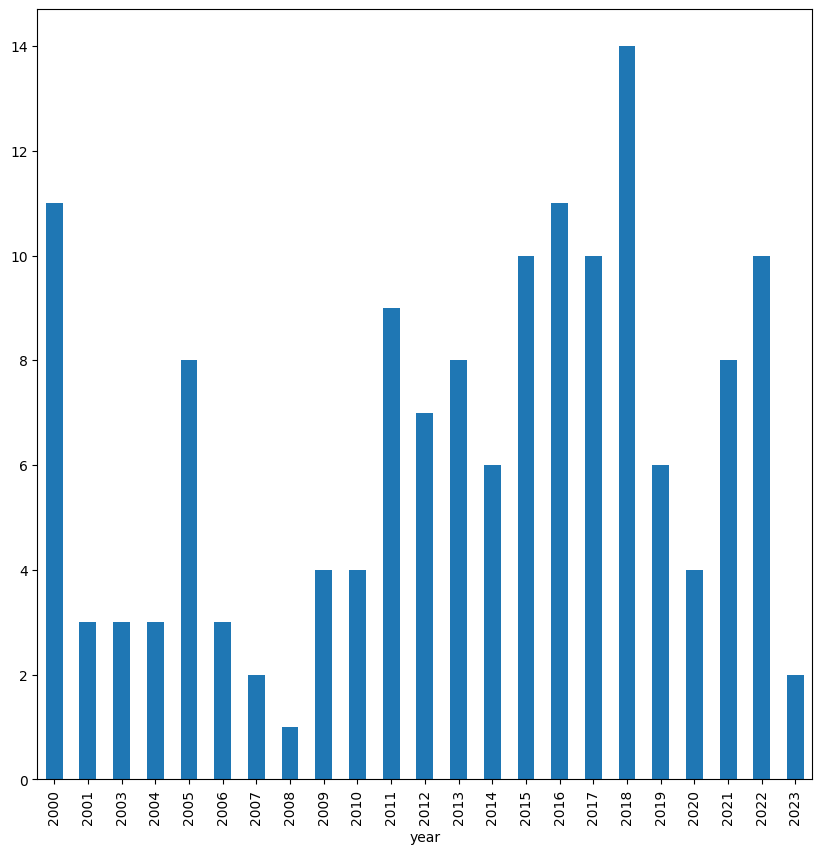

In [113]:
df_astoria['year'].value_counts().sort_index().plot(kind='bar', figsize=(10, 10))

In [126]:
#minimum year in df_active
df_active['year'].min()

2000

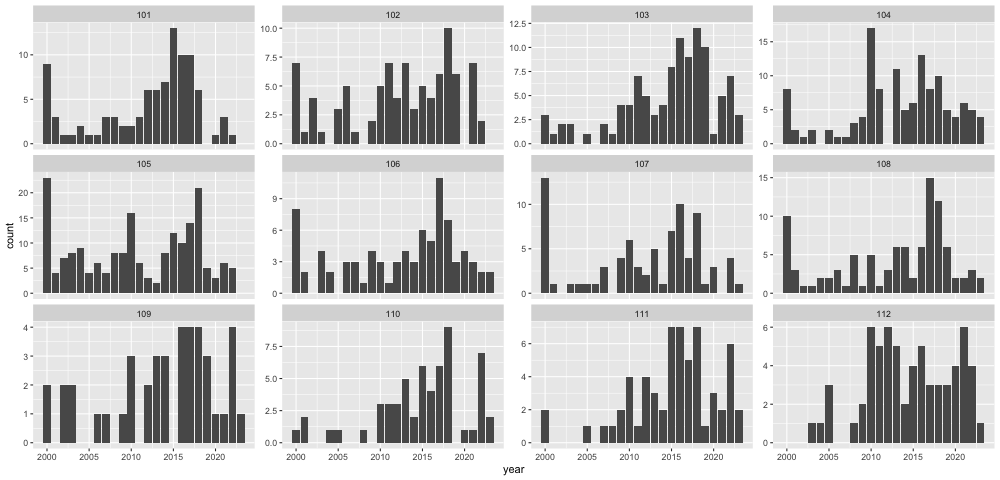

In [152]:
%%R -i df_active -w 1000

to_plot <- df_active %>% 
    filter(`Address Borough` == 'Manhattan') 

# uppercase everything in `Address Borough`
# df_active$`Address Borough` <- toupper(df_active$`Address Borough`)

ggplot(to_plot) + 
    aes(x = year) + 
    geom_bar() + 
    facet_wrap(~`Community Board`, scales='free_y')

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 10 rows containing missing values or values outside the scale range
(`geom_point()`). 



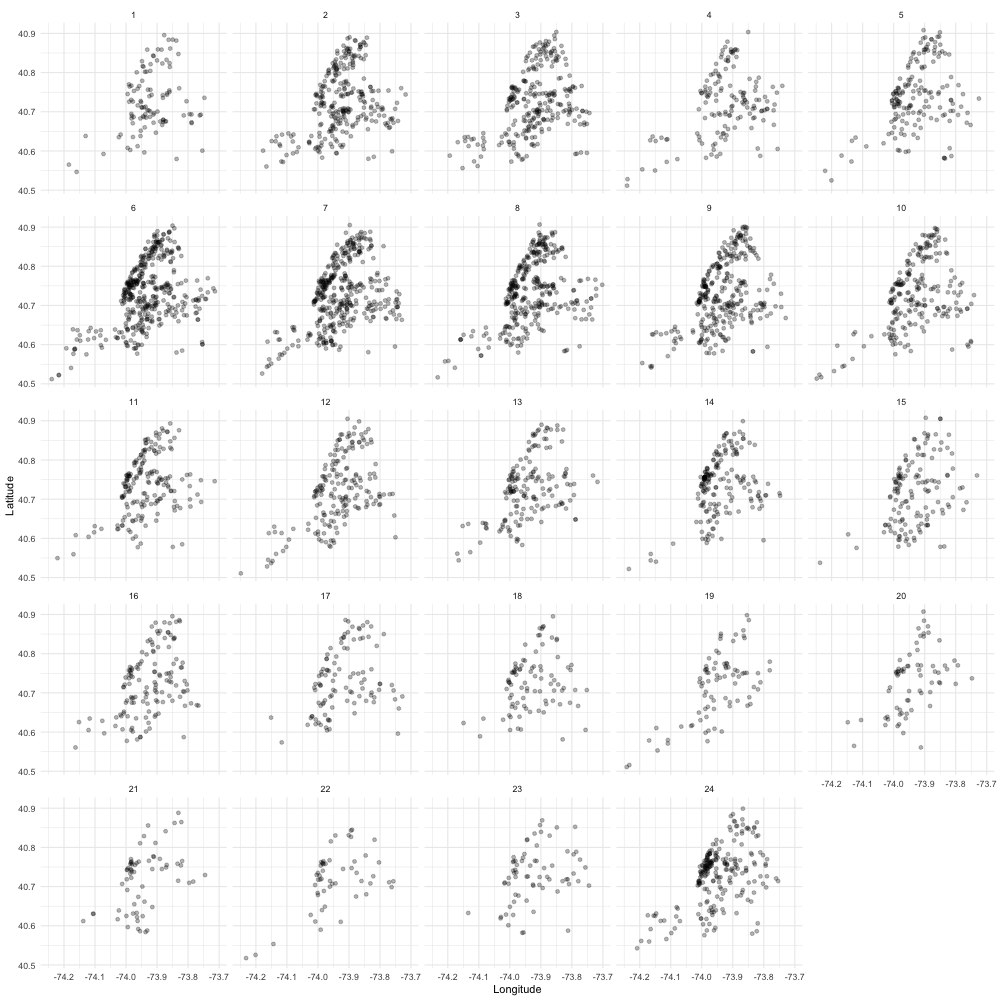

In [149]:
%%R -i df_active -w 1000 -h 1000
# ggplot map all the stores, facet wrap by age

# bucket age it older than 10 years, older than 5 years, older than 3 years and newer
df_active$age_bucket <- ifelse(df_active$age > 10, 'older than 10 years', 
                               ifelse(df_active$age > 5, 'older than 5 years', 
                                      ifelse(df_active$age > 3, 'older than 3 years', 'newer')))

# plot a map of the Longitude and Latitude columns
df_active %>%
    ggplot(aes(x = Longitude, y = Latitude)) + 
    geom_point(alpha=.3) + 
    theme_minimal() + 
    facet_wrap(~age)


#   ggplot(aes(fill = units_per_person)) + 
#   geom_sf(color = NA) + 
#   scale_fill_gradient(low="white", high="red") + 
#   theme_minimal() +
#   labs(
#     title = "There is a part of NYC where there are more housing units than people",
#     subtitle = "What's up with that?",
#     caption = "Source: US Census Bureau"
#   ) +
#   theme(
#     #make title and subitle bigger
#     plot.title = element_text(size = 20),
#     plot.subtitle = element_text(size = 15),
#     # move legend to top
#     legend.position = "top"
#   )
    


In [142]:
# make new column age of license in df_active where age = 2024 - year
df_active['age'] = 2024 - df_active['year']
df_active

,DCA License Number,License Type,License Expiration Date,License Status,License Creation Date,Industry,Business Name,Business Name 2,Address Building,Address Street Name,Secondary Address Street Name,Address City,Address State,Address ZIP,Contact Phone Number,Address Borough,Borough Code,Community Board,Council District,BIN,BBL,NTA,Census Tract,Detail,Longitude,Latitude,Location,year,age
0,1178405-DCA,Business,12/31/2023,Active,08/27/2004,Tobacco Retail Dealer,OLSEN NEWS CORP.,NaN,NaN,BROADWAY,WEST 40 STREET,NEW YORK,NY,10018,646-258-4324,Manhattan,1.0,105.0,3.0,NaN,NaN,NaN,NaN,NaN,-73.986865,40.754317,"(40.75431708865135, -73.98686541972873)",2004,20
1,2016212-1-DCA,Business,12/31/2023,Active,12/05/2014,Tobacco Retail Dealer,ASTORIA CENTER INC,NaN,4402,ASTORIA BLVD,NaN,ASTORIA,NY,11103,347-668-4569,Queens,4.0,401.0,22.0,4012858.0,4.007170e+09,QN70,141.0,NaN,-73.906927,40.768202,"(40.76820158202948, -73.9069268281986)",2014,10
2,1217359-DCA,Business,12/31/2023,Active,01/11/2006,Tobacco Retail Dealer,"FLEUR, RONY ST",RON'S DELI GROCERY STORE,17024,JAMAICA AVE,NaN,JAMAICA,NY,11432,7186589156,Queens,4.0,412.0,27.0,4217486.0,4.102120e+09,QN61,444.0,NaN,-73.789284,40.707291,"(40.70729121951161, -73.7892842185725)",2006,18
3,1435239-DCA,Business,12/31/2023,Active,06/22/2012,Tobacco Retail Dealer,PRESBYTERIAN 164 DELI CORP.,NaN,1081,SAINT NICHOLAS AVE,NaN,NEW YORK,NY,10032,212-568-3130,Manhattan,1.0,112.0,7.0,1062937.0,1.021220e+09,MN36,245.0,NaN,-73.940020,40.837602,"(40.83760200533997, -73.94001991132355)",2012,12
4,2045066-1-DCA,Business,12/31/2023,Active,10/26/2016,Tobacco Retail Dealer,A & M DELI & GRILL INC,NaN,13202,JAMAICA AVE,NaN,RICHMOND HILL,NY,11418,347-635-2975,Queens,4.0,409.0,29.0,4196340.0,4.093400e+09,QN54,14202.0,NaN,-73.820497,40.702110,"(40.70210984823282, -73.82049747055868)",2016,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,2115065-2-DCA,Business,12/31/2024,Active,07/13/2023,Tobacco Retail Dealer,BRUCKNER EXPRESSWAY INC.,NaN,1419,BRUCKNER BLVD,NaN,BRONX,NY,10472,7182292083,Bronx,2.0,209.0,17.0,2023319.0,2.037080e+09,NaN,NaN,NaN,-73.882953,40.823223,"(40.82322255964534, -73.88295261067725)",2023,1
4376,1428271-DCA,Business,12/31/2023,Active,05/07/2012,Tobacco Retail Dealer,"FAMILY DOLLAR STORES OF NEW YORK, INC.",FAMILY DOLLAR #6368,887,E NEW YORK AVE,NaN,BROOKLYN,NY,11203,7573215000,Brooklyn,3.0,309.0,41.0,3331592.0,3.014300e+09,BK60,880.0,NaN,-73.933365,40.662651,"(40.66265090040348, -73.93336484600341)",2012,12
4377,2115058-2-DCA,Business,12/31/2024,Active,07/13/2023,Tobacco Retail Dealer,"JUNIORS GOURMET DELI, JUICE BAR, & SMOKE SHOP ...",NaN,1181,BEDFORD AVE,NaN,BROOKLYN,NY,11216,6464313652,Brooklyn,3.0,303.0,36.0,3329696.0,3.018270e+09,NaN,NaN,NaN,-73.953835,40.683024,"(40.6830244295472, -73.95383474133375)",2023,1
4378,2013634-1-DCA,Business,12/31/2023,Active,09/18/2014,Tobacco Retail Dealer,TRIDEV PETROLEUM INC,GULF,755,PENNSYLVANIA AVE,NaN,BROOKLYN,NY,11207,NaN,Brooklyn,3.0,305.0,42.0,3097326.0,3.043230e+09,BK82,1104.0,NaN,-73.891155,40.659270,"(40.65927007183555, -73.89115522506118)",2014,10


In [143]:
#export as csv
df_active.to_csv('df_active.csv')